In [4]:
import pandas as pd
import networkx as nx
import numpy as np
from itertools import combinations
import matplotlib.pyplot as plt

# 1/
df = pd.read_csv('edges.csv')  

G = nx.Graph()

for comic, group in df.groupby('comic'):
    heroes = list(group['hero'])
    for pair in combinations(heroes, 2):
        if G.has_edge(*pair):
            G.edges[pair]['weight'] += 1
        else:
            G.add_edge(*pair, weight=1)

num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
degree_sequence = [d for _, d in G.degree()]
avg_degree = sum(degree_sequence) / num_nodes
std_degree = pd.Series(degree_sequence).std()
min_degree = min(degree_sequence)
max_degree = max(degree_sequence)

# Create a DataFrame with degrees
degree_df = pd.DataFrame(G.degree(), columns=['character', 'degree'])

# Sort by degree in ascending order
degree_df_sorted = degree_df.sort_values(by='degree', ascending=True)

# Save to CSV
degree_df_sorted.to_csv('hero_degrees_sorted.csv', index=False)

degree_centrality = nx.degree_centrality(G)
dc_series = pd.Series(degree_centrality)

max_dc = dc_series.idxmax(), dc_series.max()
min_dc = dc_series.idxmin(), dc_series.min()
avg_diff = (dc_series - dc_series.mean()).abs()
close_to_avg = dc_series[avg_diff.nsmallest(3).index].items()

print(f"Network Statistics:")
print(f"Total Nodes: {num_nodes}")
print(f"Total Edges: {num_edges}")
print(f"Average Degree: {avg_degree:.3f}")
print(f"Standard Deviation: {std_degree:.3f}")
print(f"Minimum Degree: {min_degree}")
print(f"Maximum Degree: {max_degree}\n")

print(f"Most Connected: {max_dc[0]} ({max_dc[1]:.3f})")
print(f"Least Connected: {min_dc[0]} ({min_dc[1]:.3f})")
print("\nClose to Average Centrality:")
for char, score in close_to_avg:
    print(f"{char}: {score:.3f}")

Network Statistics:
Total Nodes: 6421
Total Edges: 171644
Average Degree: 53.463
Standard Deviation: 116.755
Minimum Degree: 1
Maximum Degree: 1919

Most Connected: CAPTAIN AMERICA (0.299)
Least Connected: MASTER OF VENGEANCE (0.000)

Close to Average Centrality:
CAPTAIN HAWK: 0.008
GROTESK: 0.008
ISHIMA, DAVID: 0.008


In [5]:
# 2/
deg_dict = dict(G.degree())

degree_to_nodes = {}
for node, deg in deg_dict.items():
    degree_to_nodes.setdefault(deg, []).append(node)

results = []
for k, nodes in sorted(degree_to_nodes.items()):
    if len(nodes) < 2:
        continue

    dists = []
    for u, v in combinations(nodes, 2):
        try:
            d = nx.shortest_path_length(G, source=u, target=v)
            dists.append(d)
        except nx.NetworkXNoPath:
            pass

    if len(dists) > 0:
        avg_dist = np.mean(dists)
        var_dist = np.var(dists, ddof=0)
    else:
        avg_dist = np.nan
        var_dist = np.nan

    results.append({
        'degree': k,
        'n_nodes': len(nodes),
        'avg_distance': avg_dist,
        'var_distance': var_dist
    })

df_summary = pd.DataFrame(results).set_index('degree')
print(df_summary)

#Save the summary to a CSV file
df_summary.to_csv('degree_summary.csv')

        n_nodes  avg_distance  var_distance
degree                                     
1            52      3.243067      0.250870
2            85      3.260224      0.259734
3           102      3.228888      0.268907
4           147      3.108937      0.226601
5           179      3.138158      0.250512
...         ...           ...           ...
492           2      1.000000      0.000000
550           3      1.000000      0.000000
743           2      1.000000      0.000000
1088          2      1.000000      0.000000
1133          2      1.000000      0.000000

[257 rows x 3 columns]


In [3]:
# 3/
results = []
for k, nodes in sorted(degree_to_nodes.items()):
    if len(nodes) < 2:
        continue

    sims = []
    for u, v in combinations(nodes, 2):
        nbrs_u = set(G.neighbors(u))
        nbrs_v = set(G.neighbors(v))
        if k > 0:
            sim = len(nbrs_u & nbrs_v) / np.sqrt(k * k)
            sims.append(sim)

    if sims:
        avg_sim  = np.mean(sims)
        std_sim  = np.std(sims, ddof=0)
    else:
        avg_sim, std_sim = np.nan, np.nan

    results.append({
        'degree':    k,
        'n_nodes':   len(nodes),
        'avg_sim':   avg_sim,
        'std_sim':   std_sim
    })

df_struct_eq = pd.DataFrame(results).set_index('degree')
print(df_struct_eq)

        n_nodes   avg_sim   std_sim
degree                             
1            52  0.024887  0.155780
2            85  0.014006  0.087447
3           102  0.011713  0.074693
4           147  0.017380  0.084092
5           179  0.016559  0.088022
...         ...       ...       ...
492           2  0.247967  0.000000
550           3  0.441212  0.038750
743           2  0.530283  0.000000
1088          2  0.442096  0.000000
1133          2  0.806708  0.000000

[257 rows x 3 columns]


In [4]:
# 4.1/
closeness_centrality = nx.closeness_centrality(G)
cc_series = pd.Series(closeness_centrality)

# Task 4.1: Global
cmean = cc_series.mean()
max_cc = (cc_series.idxmax(), cc_series.max())
min_cc = (cc_series.idxmin(), cc_series.min())
avg_diff_cc = (cc_series - cmean).abs()
close_to_avg_cc = cc_series[avg_diff_cc.nsmallest(3).index]

print("\nNetwork Statistics (Closeness Centrality):")
print(f"Most Central (Closeness): {max_cc[0]} ({max_cc[1]:.3f})")
print(f"Least Central (Closeness): {min_cc[0]} ({min_cc[1]:.3f})")
print("Close to Average Closeness Centrality:")
for char, score in close_to_avg_cc.items():
    print(f"- {char}: {score:.3f}")


Network Statistics (Closeness Centrality):
Most Central (Closeness): CAPTAIN AMERICA (0.584)
Least Central (Closeness): MASTER OF VENGEANCE (0.000)
Close to Average Closeness Centrality:
- JAKAR: 0.383
- NEMESIS: 0.383
- LUMINOR: 0.383


In [5]:
# 4.2/
results_cc_dist = []
for val in sorted(set(cc_series.values)):
    group = [n for n, c in closeness_centrality.items() if c == val]
    if len(group) < 2:
        results_cc_dist.append({'centrality_value': val, 'avg_distance': np.nan, 'variance': np.nan})
    else:
        dists = []
        for u, v in combinations(group, 2):
            try:
                d = nx.shortest_path_length(G, source=u, target=v)
                dists.append(d)
            except nx.NetworkXNoPath:
                continue
        dists = np.array(dists)
        results_cc_dist.append({
            'centrality_value': val,
            'avg_distance': dists.mean() if dists.size else np.nan,
            'variance': dists.var(ddof=0) if dists.size else np.nan
        })
cc_dist_df = pd.DataFrame(results_cc_dist)
print("\nAverage Distance by Closeness Centrality:")
print(cc_dist_df.to_string(index=False))


Average Distance by Closeness Centrality:
 centrality_value  avg_distance  variance
         0.000156      1.000000  0.000000
         0.000935      1.000000  0.000000
         0.000997           NaN       NaN
         0.001108      1.000000  0.000000
         0.001246      1.000000  0.000000
         0.259926      1.000000  0.000000
         0.260712           NaN       NaN
         0.262383      2.000000  0.000000
         0.262394      1.666667  0.222222
         0.262405           NaN       NaN
         0.264350      1.000000  0.000000
         0.264756           NaN       NaN
         0.264767      3.666667  3.555556
         0.264778      1.000000  0.000000
         0.268181           NaN       NaN
         0.268361           NaN       NaN
         0.273150           NaN       NaN
         0.276593      1.000000  0.000000
         0.286434      1.000000  0.000000
         0.289303           NaN       NaN
         0.289316      1.000000  0.000000
         0.289329           NaN  

In [6]:
# 4.3/
nodes = list(G.nodes())
node_to_idx = {n: i for i, n in enumerate(nodes)}
A = nx.to_numpy_array(G, nodelist=nodes)

# 4.3/
results_cc_struct = []
for val in sorted(set(closeness_centrality.values())):
    group = [n for n, c in closeness_centrality.items() if c == val]
    idxs = [node_to_idx[n] for n in group if n in node_to_idx]
    sims = []
    for i, j in combinations(idxs, 2):
        u = A[i]
        v = A[j]
        norm_u = np.linalg.norm(u)
        norm_v = np.linalg.norm(v)
        sim = np.dot(u, v) / (norm_u * norm_v) if norm_u and norm_v else 0.0
        sims.append(sim)
    sims = np.array(sims)
    results_cc_struct.append({
        'centrality_value': val,
        'avg_similarity': sims.mean() if sims.size > 0 else np.nan,
        'std_similarity': sims.std(ddof=0) if sims.size > 0 else np.nan
    })
cc_struct_df = pd.DataFrame(results_cc_struct)
print("\nStructural Equivalence by Closeness Centrality:")
print(cc_struct_df.to_string(index=False))



Structural Equivalence by Closeness Centrality:
 centrality_value  avg_similarity  std_similarity
         0.000156        0.000000    0.000000e+00
         0.000935        0.833333    0.000000e+00
         0.000997             NaN             NaN
         0.001108        0.857143    0.000000e+00
         0.001246        0.826087    2.220446e-16
         0.259926        0.666667    1.110223e-16
         0.260712             NaN             NaN
         0.262383        0.750000    0.000000e+00
         0.262394        0.800000    0.000000e+00
         0.262405             NaN             NaN
         0.264350        0.709677    1.110223e-16
         0.264756             NaN             NaN
         0.264767        0.250000    3.535534e-01
         0.264778        0.636364    0.000000e+00
         0.268181             NaN             NaN
         0.268361             NaN             NaN
         0.273150             NaN             NaN
         0.276593        0.833333    1.110223e-16
 

In [7]:
# 5/
components = list(nx.connected_components(G))
components_sorted = sorted(components, key=len, reverse=True)
largest_comp_nodes = components_sorted[0]
G_largest = G.subgraph(largest_comp_nodes)
diameter_largest = nx.diameter(G_largest)

print(f"Total number of connected components: {len(components)}")
print("Sizes of the 3 largest components:", [len(c) for c in components_sorted[:3]])
print(f"Diameter of the largest component: {diameter_largest}")

Total number of connected components: 4
Sizes of the 3 largest components: [6403, 9, 7]
Diameter of the largest component: 5


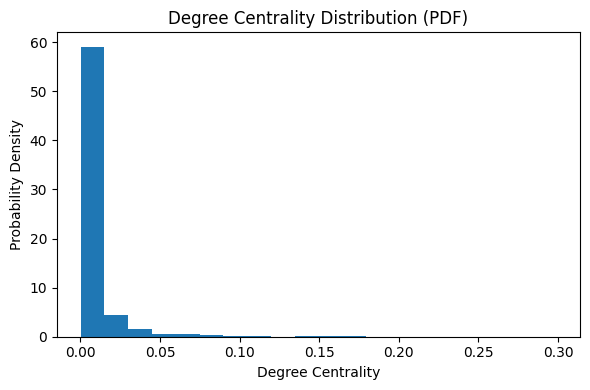

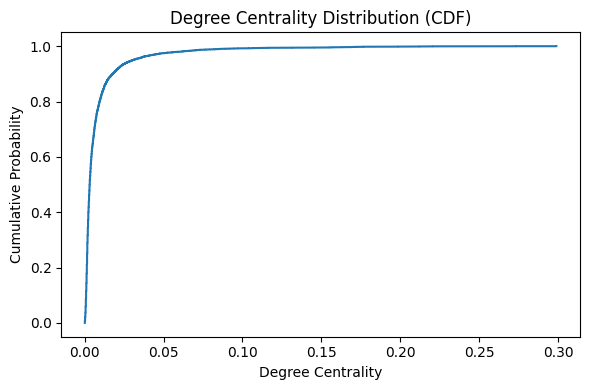

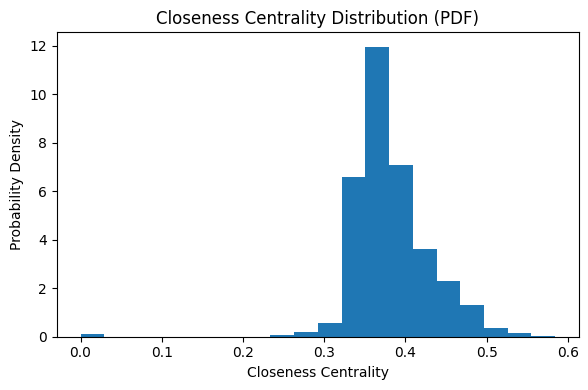

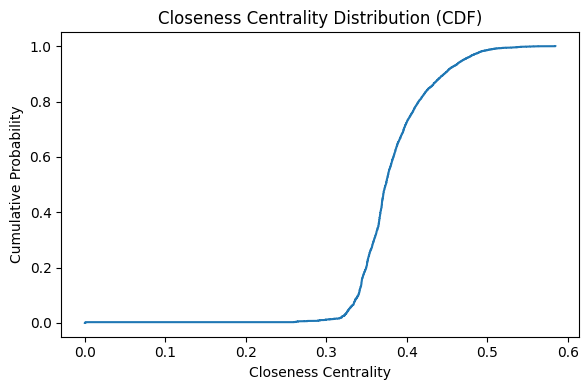

In [8]:
# 6/
deg_cent = nx.degree_centrality(G)
clo_cent = nx.closeness_centrality(G)

deg_vals = np.array(list(deg_cent.values()))
clo_vals = np.array(list(clo_cent.values()))

# --- Degree Centrality PDF ---
plt.figure(figsize=(6,4))
plt.hist(deg_vals, bins=20, density=True)
plt.xlabel('Degree Centrality')
plt.ylabel('Probability Density')
plt.title('Degree Centrality Distribution (PDF)')
plt.tight_layout()
plt.show()

# --- Degree Centrality CDF ---
sorted_deg = np.sort(deg_vals)
cdf_deg = np.arange(1, len(sorted_deg)+1) / len(sorted_deg)
plt.figure(figsize=(6,4))
plt.step(sorted_deg, cdf_deg, where='post')
plt.xlabel('Degree Centrality')
plt.ylabel('Cumulative Probability')
plt.title('Degree Centrality Distribution (CDF)')
plt.tight_layout()
plt.show()

# --- Closeness Centrality PDF ---
plt.figure(figsize=(6,4))
plt.hist(clo_vals, bins=20, density=True)
plt.xlabel('Closeness Centrality')
plt.ylabel('Probability Density')
plt.title('Closeness Centrality Distribution (PDF)')
plt.tight_layout()
plt.show()

# --- Closeness Centrality CDF ---
sorted_clo = np.sort(clo_vals)
cdf_clo = np.arange(1, len(sorted_clo)+1) / len(sorted_clo)
plt.figure(figsize=(6,4))
plt.step(sorted_clo, cdf_clo, where='post')
plt.xlabel('Closeness Centrality')
plt.ylabel('Cumulative Probability')
plt.title('Closeness Centrality Distribution (CDF)')
plt.tight_layout()
plt.show()

In [9]:
# 7/
import sqlite3

clust_dict = nx.clustering(G) 

db_path = 'clustering.db'
conn = sqlite3.connect(db_path)
c = conn.cursor()

c.execute('''
    CREATE TABLE IF NOT EXISTS node_clustering (
        node TEXT PRIMARY KEY,
        clustering_coeff REAL
    )
''')

rows = [(str(node), float(coeff)) for node, coeff in clust_dict.items()]
c.executemany('''
    INSERT OR REPLACE INTO node_clustering (node, clustering_coeff)
    VALUES (?, ?)
''', rows)

conn.commit()
conn.close()

print(f"Saved clustering coefficients for {len(rows)} nodes to '{db_path}'.")

Saved clustering coefficients for 6421 nodes to 'clustering.db'.


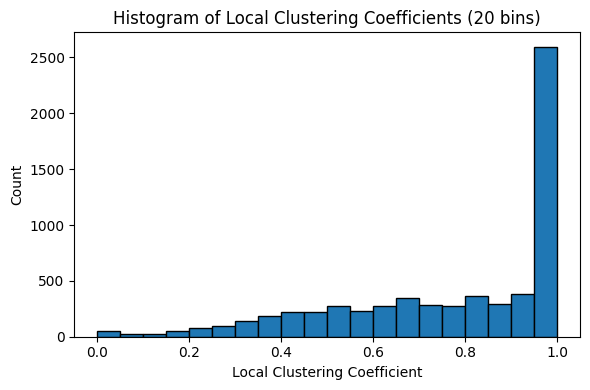

Fitted power‑law:  p(x) ∝ x^(-1.373),  xmin=0.050
Empirical R² of the power‑law fit: -0.6729


In [10]:
# 8/
import powerlaw
values = np.array(list(clust_dict.values()))

bins = np.linspace(0, 1, 21)
plt.figure(figsize=(6,4))
plt.hist(values, bins=bins, edgecolor='black')
plt.xlabel('Local Clustering Coefficient')
plt.ylabel('Count')
plt.title('Histogram of Local Clustering Coefficients (20 bins)')
plt.tight_layout()
plt.show()

data = values[values > 0]
fit = powerlaw.Fit(data, xmin=data.min())  
alpha = fit.power_law.alpha
xmin  = fit.power_law.xmin
print(f"Fitted power‑law:  p(x) ∝ x^(-{alpha:.3f}),  xmin={xmin:.3f}")

hist, bin_edges = np.histogram(data, bins=20, range=(xmin, data.max()), density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

C = (alpha - 1) * xmin**(alpha - 1)
pdf_theo = C * bin_centers**(-alpha)

y_obs = hist
y_pred = pdf_theo
ss_res = np.sum((y_obs - y_pred)**2)
ss_tot = np.sum((y_obs - y_obs.mean())**2)
r_squared = 1 - ss_res / ss_tot
print(f"Empirical R² of the power‑law fit: {r_squared:.4f}")